<font color = 'red'>
<h1>Avocado Data Analysis<h1>

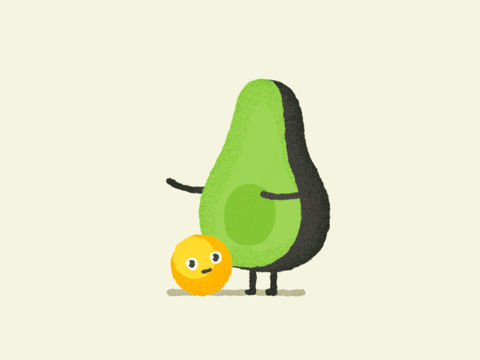

 
<br>
<br>
* This data was downloaded from the Hass Avocado Board website and compiled as a single CSV.
  http://www.hassavocadoboard.com/retail/volume-and-price-data
<br>
<br>
* The data set shows weekly retail screening data from 2015 to March 2018 for “National Retail Volume (PLU) and price. Retail screening data comes directly from retailers' cash registers based on actual retail sales of Hass avocados.
<br>
<br>

# Contents

1. [Prepare Problems](#1)
    * [Load Libraries](#2)
    * [Load Dataset](#3)    
1. [Descriptive Data Analysis](#4)
1. [Missing Value](#5)
1. [Visualization](#6)
1. [Feature Engineering](#7)
1. [Classification Modeling](#8)
    * [Classic Models](#9)
    * [Ensemble Models](#10)
    * [XGBOOST Model](#11)
    * [Neural Network](#12)
    * [Compare Models](#13)
1. [Regression Modeling](#14)
    * [Classic Models](#15)
    * [Ensemble Models](#16)
    * [XGBOOST Model](#17)
    * [Neural Network](#18)
    * [Compare Models](#19)
    * [Let's Make Some Price Predictions via ETR](#20)
    * [Facebook Prophet](#21)
    * [H20.ai AutoML](#22)
   

<font color = 'red'>
<a id = "1"></a><br>
<h1>Identification of problems<h1>
<font color = 'blue'>
      1) Avocado 'Is it organic?' Classification<br><br>
      2) Avocado Price Prediction

<a id = "2"></a><br>
## Load Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
#
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
#
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")

<a id = "3"></a><br>
## Load Dataset

In [2]:
data = pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Properties of the data set
* Date - Observation date
* Average Price - average price for a single avocado
* type - traditional or organic
* year - year
* Region - city or region of observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold


In [3]:
# Regions
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [4]:
# data counts of the regions
print(data["region"].value_counts(dropna=False))

SouthCarolina          338
DallasFtWorth          338
CincinnatiDayton       338
SanFrancisco           338
Indianapolis           338
Seattle                338
NewOrleansMobile       338
LasVegas               338
RaleighGreensboro      338
BuffaloRochester       338
Chicago                338
RichmondNorfolk        338
Atlanta                338
Jacksonville           338
Charlotte              338
Nashville              338
Louisville             338
NewYork                338
LosAngeles             338
Boston                 338
Roanoke                338
West                   338
Orlando                338
Portland               338
BaltimoreWashington    338
StLouis                338
GrandRapids            338
Sacramento             338
Southeast              338
Columbus               338
PhoenixTucson          338
SouthCentral           338
GreatLakes             338
Plains                 338
Albany                 338
SanDiego               338
California             338
H

<a id = "4"></a><br>
## Descriptive Analysis


In [5]:
# data shape:
row, columns = data.shape
print("Data Row:", row)
print("Data Columns:", columns)

Data Row: 18249
Data Columns: 14


In [6]:
# column names:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
# descriptions 
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [11]:
# class distribution 
print("Data is not unbalanced:",data.groupby('type').size())

Data is not unbalanced: type
conventional    9126
organic         9123
dtype: int64


In [12]:
# data types
print("Column Types:",data.dtypes)

Column Types: Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


<a id = "5"></a><br>
## Missing Values


In [13]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<a id = "6"></a><br>
## Data Visualization

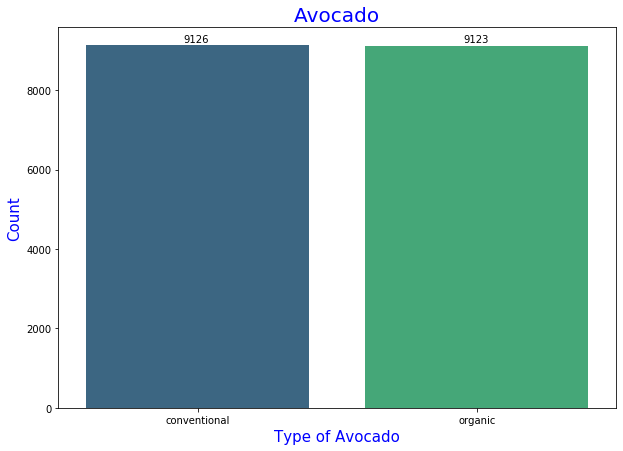

In [14]:
f,ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x=data.type,label="Count",palette="viridis")
plt.xlabel('Type of Avocado',fontsize = 15,color='blue')
plt.ylabel('Count',fontsize = 15,color='blue')
plt.title('Avocado',fontsize = 20,color='blue')
#total = len(data['year'])
# how to show counts:
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

Text(0, 0.5, 'Average Price')

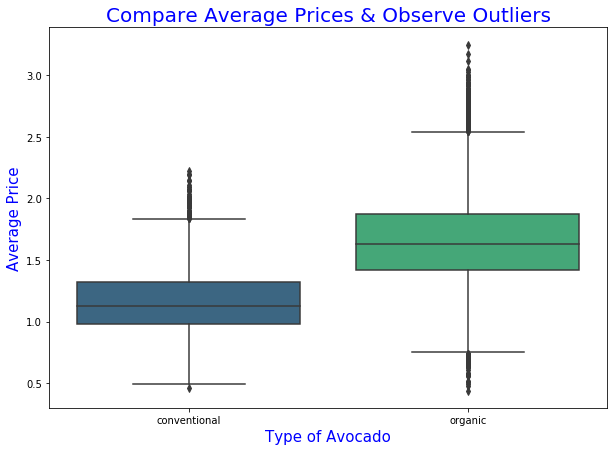

In [15]:
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x="type", y="AveragePrice",data=data,palette="viridis");
plt.title("Compare Average Prices & Observe Outliers",fontsize = 20,color='blue')
plt.xlabel('Type of Avocado',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

Text(0, 0.5, 'Average Price')

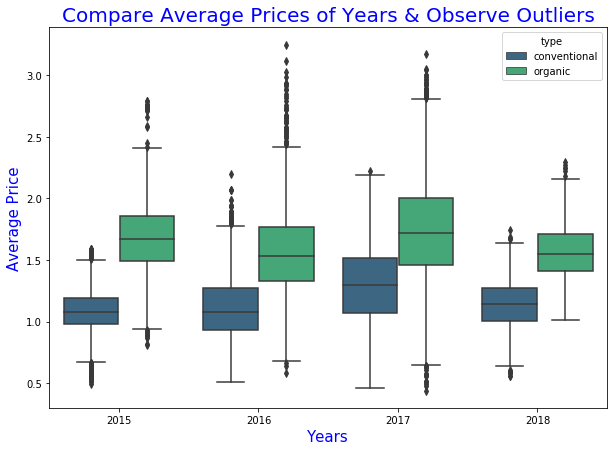

In [16]:
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x="year", y="AveragePrice",hue="type",data=data,palette="viridis");
plt.title("Compare Average Prices of Years & Observe Outliers",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

Text(0, 0.5, 'Average Price')

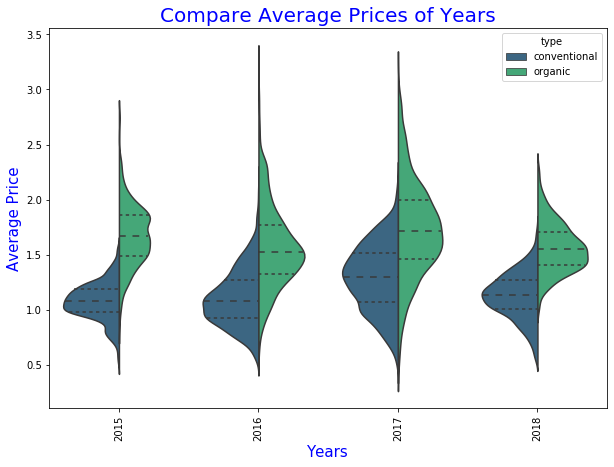

In [17]:
f,ax = plt.subplots(figsize = (10,7))
sns.violinplot(x="year", y="AveragePrice", hue="type", data=data,split=True, inner="quart",palette="viridis")
plt.xticks(rotation=90)
plt.title("Compare Average Prices of Years",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

Text(56.625, 0.5, 'Average Price')

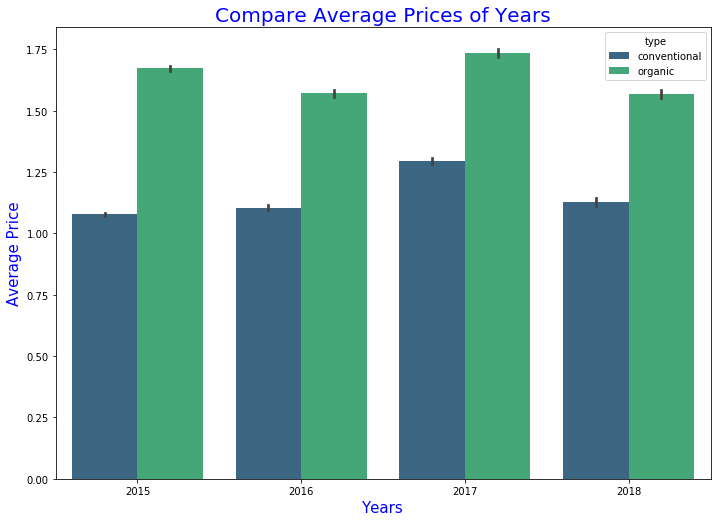

In [18]:
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x="year", y="AveragePrice",hue="type",data=data,palette="viridis")
plt.tight_layout() # grafikler daha düzgün gözükecek
plt.title("Compare Average Prices of Years",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

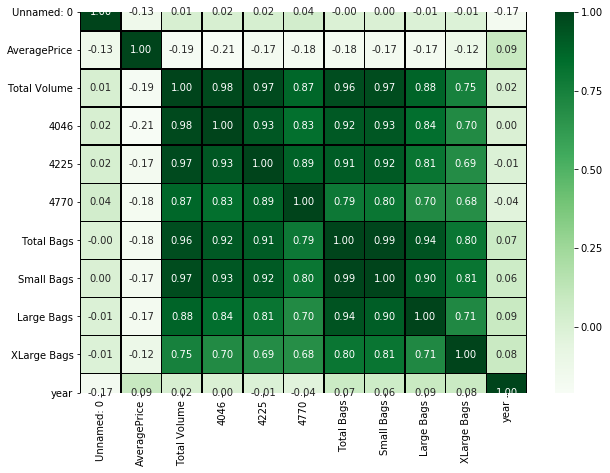

In [19]:
f,ax = plt.subplots(figsize = (10,7))
#data.drop("Unnamed: 0",axis=1,inplace=True)
sns.heatmap(data.corr(), annot=True,cmap = 'Greens', linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax)

In [20]:
data.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [21]:
# Split Dataset, "conventional & organic"
data_con = data[data["type"] == "conventional"]
data_org = data[data["type"] == "organic"]

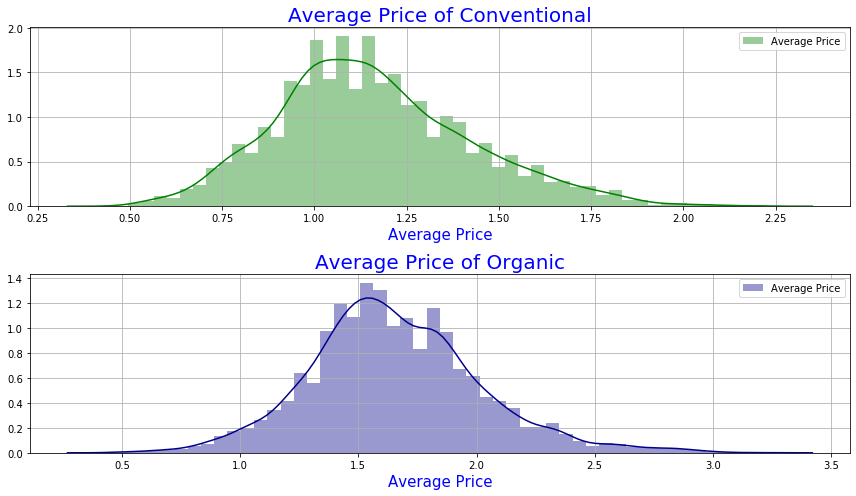

In [22]:
f,ax = plt.subplots(figsize = (12,7))
plt.subplot(2,1,1) # ikiye birlik düzlemde ilk grafik
sns.distplot(data_con.AveragePrice,color="green",label="Average Price");
plt.title("Average Price of Conventional",fontsize = 20,color='blue')
plt.xlabel('Average Price',fontsize = 15,color='blue')
plt.legend()
plt.grid()
#
plt.subplot(2,1,2)
sns.distplot(data_org.AveragePrice,color="darkblue",label="Average Price");
plt.title("Average Price of Organic",fontsize = 20,color='blue')
plt.xlabel('Average Price',fontsize = 15,color='blue')
plt.tight_layout() # grafikler daha düzgün gözükecek
plt.legend()
plt.grid()

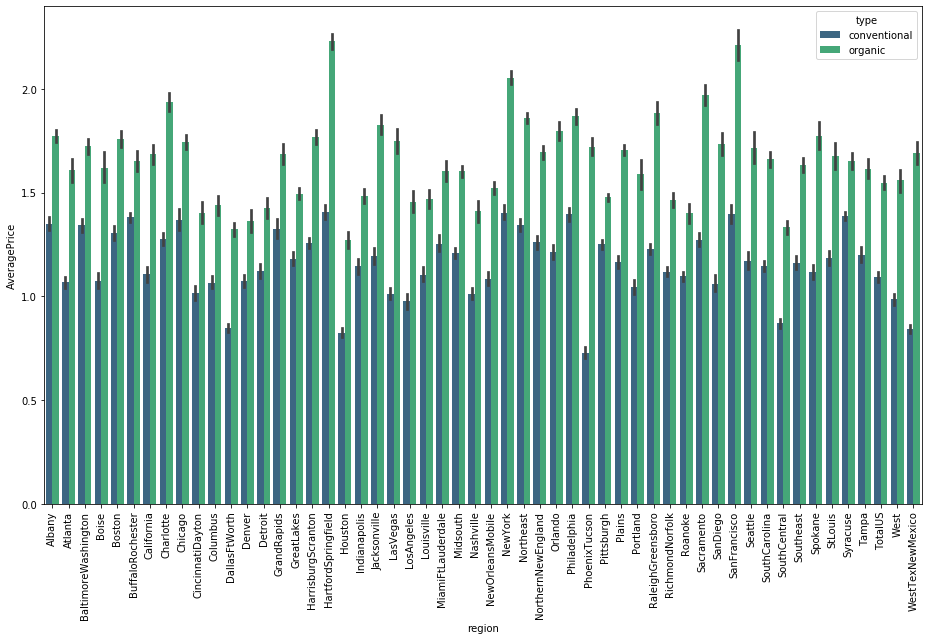

In [23]:
# Avocado Average Price
f,ax = plt.subplots(figsize = (13,9))
sns.barplot(x="region", y="AveragePrice",hue="type",data=data,palette="viridis")
plt.xticks(rotation=90)
plt.tight_layout() # grafikler daha düzgün gözükecek

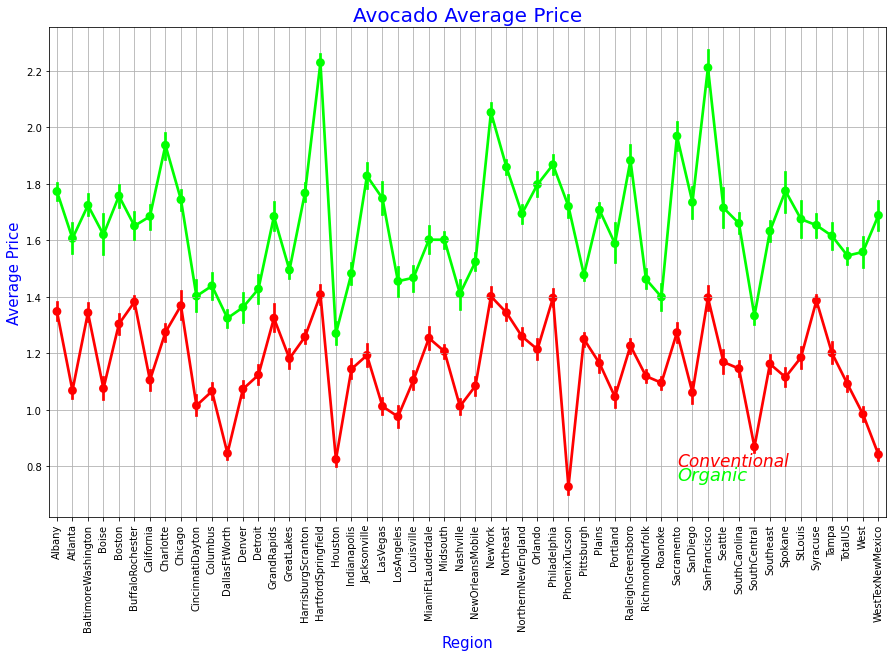

In [21]:
# Avocado Average Price
f,ax = plt.subplots(figsize = (15,9))
sns.pointplot(x='region',y='AveragePrice',data=data_org,color='lime',alpha=0.8)
sns.pointplot(x='region',y='AveragePrice',data=data_con,color='red',alpha=0.8)
plt.text(40,0.8,'Conventional',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.75,'Organic',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('Region',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')
plt.title('Avocado Average Price',fontsize = 20,color='blue')
plt.xticks(rotation=90)
plt.grid()

(-0.5, 511.5, 383.5, -0.5)

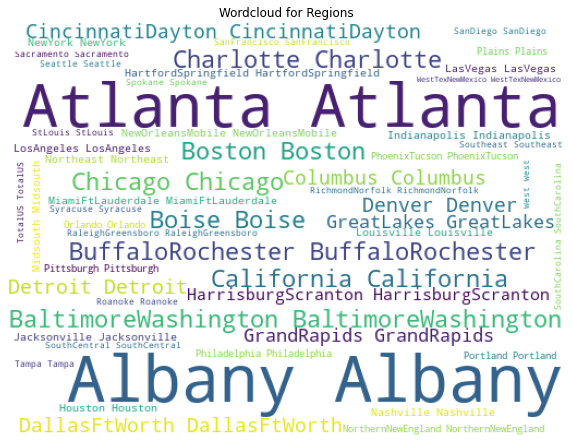

In [22]:
#conda install -c conda-forge wordcloud
#from wordcloud import WordCloud 
# how many times using regions in dataset
from wordcloud import WordCloud 
data_region = data.region
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate("*".join(data_region))
plt.imshow(wordcloud)
plt.title("Wordcloud for Regions")
plt.axis('off')

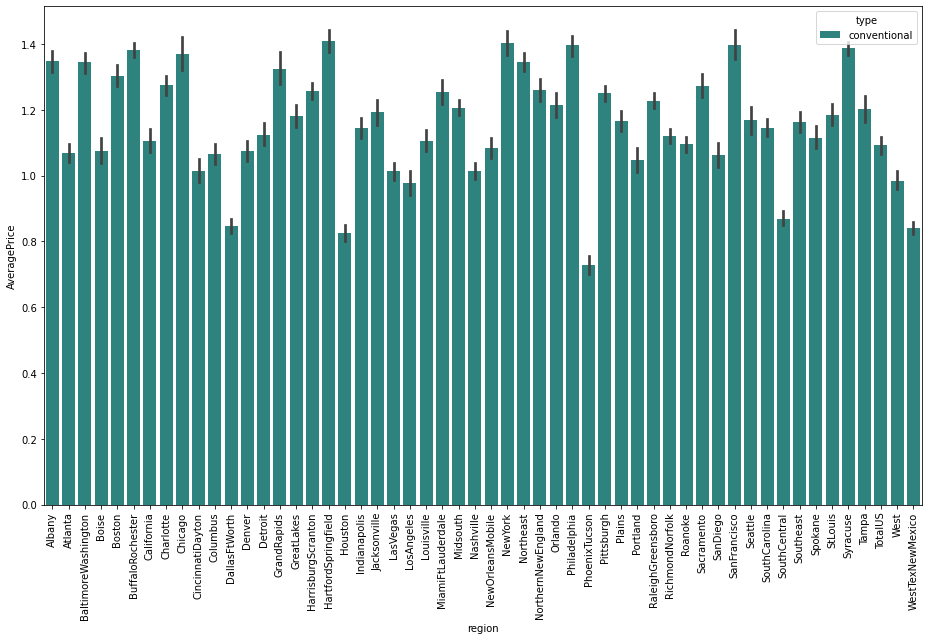

In [23]:
f,ax = plt.subplots(figsize = (13,9))
sns.barplot(x="region", y="AveragePrice",hue="type",data=data_con,palette="viridis")
plt.xticks(rotation=90)
plt.tight_layout() # grafikler daha düzgün gözükecek

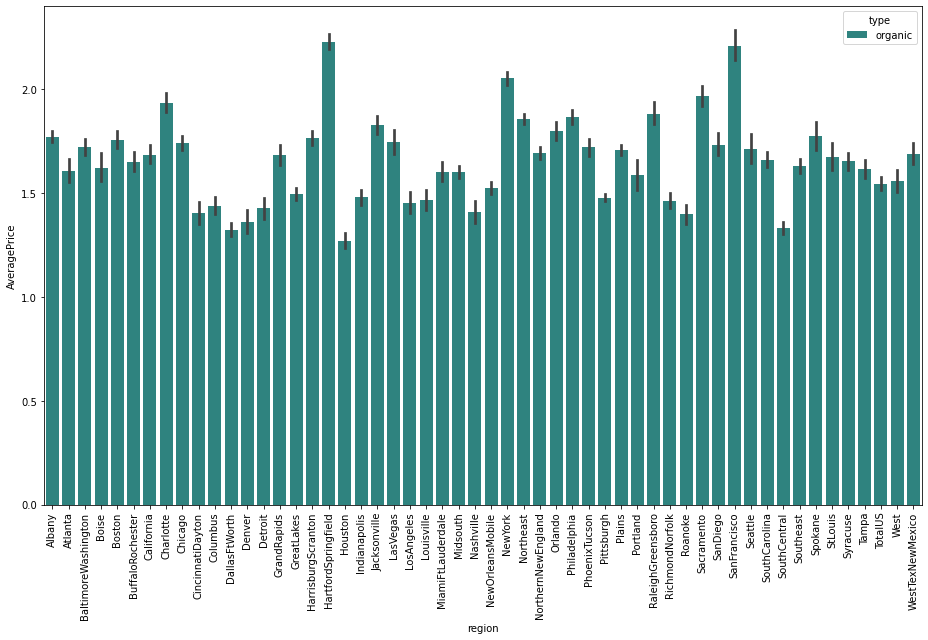

In [24]:
f,ax = plt.subplots(figsize = (13,9))
sns.barplot(x="region", y="AveragePrice",hue="type",data=data_org,palette="viridis")
plt.xticks(rotation=90)
plt.tight_layout() # for smoother graphics

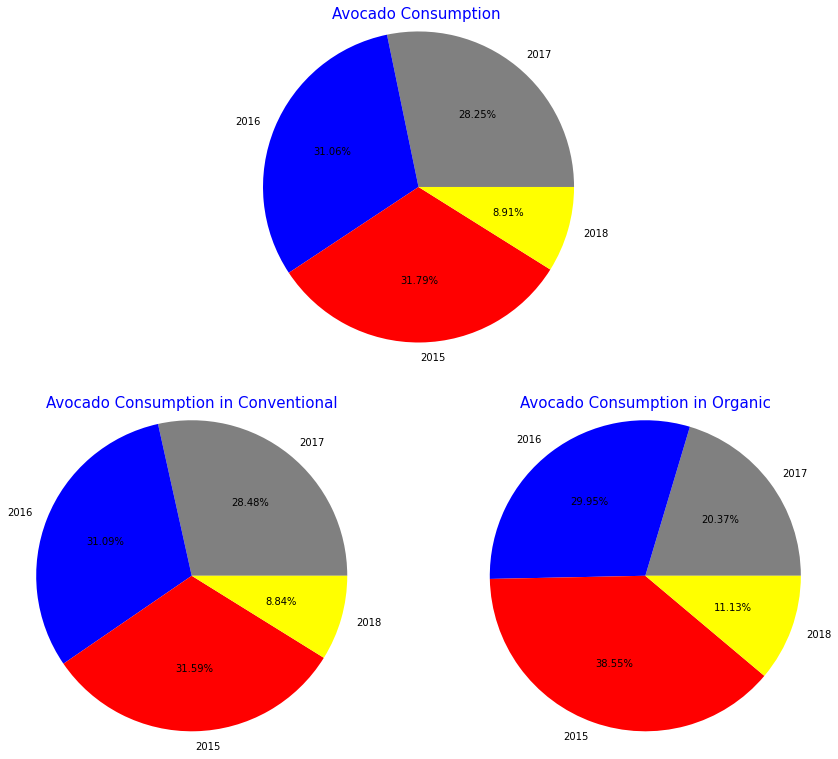

<Figure size 432x288 with 0 Axes>

In [25]:
# Sum(ounce) of Avocados for per year
data_2015 = data[data.year==2015]
sum_2015 = data_2015["Total Volume"].sum()
data_2016 = data[data.year==2016]
sum_2016 = data_2016["Total Volume"].sum()
data_2017 = data[data.year==2017]
sum_2017 = data_2017["Total Volume"].sum()
data_2018 = data[data.year==2018]
sum_2018 = data_2018["Total Volume"].sum()
#**********************************************************************************
# Sum(ounce) of Avocados for per year in conventional
data_con_2015 = data_con[data.year==2015]
sum_con_2015 = data_con_2015["Total Volume"].sum()
data_con_2016 = data_con[data.year==2016]
sum_con_2016 = data_con_2016["Total Volume"].sum()
data_con_2017 = data_con[data.year==2017]
sum_con_2017 = data_con_2017["Total Volume"].sum()
data_con_2018 = data_con[data.year==2018]
sum_con_2018 = data_con_2018["Total Volume"].sum()
#**********************************************************************************
# Sum(ounce) of Avocados for per year in organic
data_org_2015 = data_org[data.year==2015]
sum_org_2015 = data_org_2015["Total Volume"].sum()
data_org_2016 = data_org[data.year==2016]
sum_org_2016 = data_org_2016["Total Volume"].sum()
data_org_2017 = data_org[data.year==2017]
sum_org_2017 = data_org_2017["Total Volume"].sum()
data_org_2018 = data_org[data.year==2018]
sum_org_2018 = data_org_2018["Total Volume"].sum()

labels = data.year.value_counts().index
colors = ['grey','blue','red','yellow']
fracs = [15, 30, 45, 10]
sizes_1 = [sum_con_2015,sum_con_2016,sum_con_2017,sum_con_2018]#for con
fig = plt.figure(figsize = (9,9))
#
sizes_2 = [sum_org_2015,sum_org_2016,sum_org_2017,sum_org_2018]#for org
ax1 = fig.add_axes([0, -0.1, .5, .5], aspect=1)
ax1.pie(sizes_1, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
ax2 = fig.add_axes([0.7, -0.1, .5, .5], aspect=1)
ax2.pie(sizes_2, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
sizes_0 = [sum_2015,sum_2016,sum_2017,sum_2018]
ax3 = fig.add_axes([.35, 0, .5, 1.5], aspect=1)
ax3.pie(sizes_0, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
ax1.set_title('Avocado Consumption in Conventional',color = 'blue',fontsize = 15)
ax2.set_title('Avocado Consumption in Organic',color = 'blue',fontsize = 15)
ax3.set_title('Avocado Consumption ',color = 'blue',fontsize = 15)
plt.show()
plt.tight_layout() # for smoother graphics

<a id = "7"></a><br>
## Feature Engineering

In [26]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [27]:
# split date: day,month,year 
liste = []
for date in data.Date:
    liste.append(date.split("-"))
    
# month and day adding to lists
month = []
day = []
for i in range(len(liste)):
    month.append(liste[i][1])
    day.append(liste[i][2])
    
# adding to dataset
data["month"] = month
data["day"] = day

# delete old date column
data.drop(["Date"],axis=1,inplace=True)

#convert objects to int
data.month = data.month.values.astype(int)
data.day = data.day.values.astype(int)

In [28]:
# drop unnecessary features
data.drop(["Unnamed: 0","region"],axis=1,inplace=True)

### Converting Categorical Data to Numerical Values (Label Encoding)

In [29]:
# find dummy variables
data["type"] = pd.get_dummies(data.type,drop_first=True)

In [30]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29


<a id = "8"></a><br>
## Classification Modeling
### Is Your Avocado Organic or Conventional

<a id = "9"></a><br>
### Classic Models

In [31]:
# Y
y = data[["type"]][:]

In [32]:
# X
x = data.drop(["type"],axis=1,inplace=True)
x = data.iloc[:,:]

* To ensure that all values contribute equally, the values must be brought to the same unit. The data, which varies in terms of size, will increase the variance in distance calculations and will outweigh the low-value features in weight calculations and will not have an equal effect.

In [33]:
# Scale the data to be between 
sc = StandardScaler()
x = sc.fit_transform(x)

### Separation of Data as Training and Test Data
* We divide the data set we will use for our model into two parts as training and test data sets. While we train the model with training data, we evaluate the success of our learned model with training data using our test data. The division process is usually done as 66/34.
* While 67% is training data, 33% is separated as a test. 

In [34]:
# Creating Train and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Determining the Most Appropriate Model for the Data Set

In [35]:
# Model List
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))

### K-Fold Cross Validation
* It is a concept that comes up when we want to test every aspect of a data set.
* The aim here is to divide the data set into parts and evaluate the results by making experiments on different parts. In other words, there is a step like in the table below. Meanwhile, a value of k is given and this gives us the number of steps.

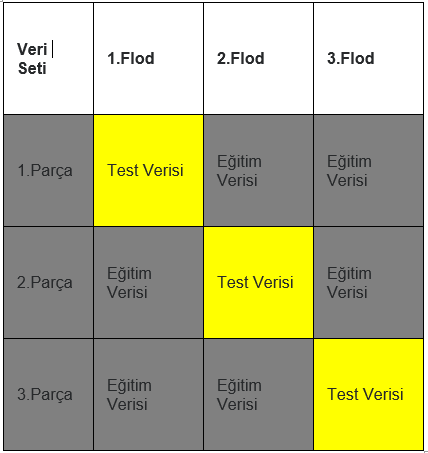

In [36]:
# evaluate models using cross validation score:
results = [] 
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print("Model Name:{} Model Acc:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

Model Name:LR Model Acc:0.917 Model Std:0.005
Model Name:KNN Model Acc:0.884 Model Std:0.010
Model Name:SVM Model Acc:0.920 Model Std:0.003
Model Name:NB Model Acc:0.866 Model Std:0.010
Model Name:DTC Model Acc:0.983 Model Std:0.003


### Showing Success of Models with Boxplot

NameError: name 'names' is not defined

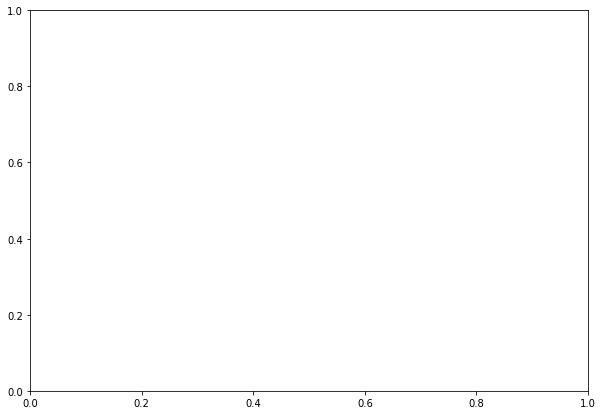

In [24]:
# Compare Model's Acc
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x=names, y=results,palette="viridis");
plt.title("Compare Model's Accuracies",fontsize = 20,color='blue')
plt.xlabel('Models',fontsize = 15,color='blue')
plt.ylabel('Accuracies',fontsize = 15,color='blue')

### Selecting Appropriate Parameters for the Highest Scoring Model

In [ ]:
# Tuning Decision Tree Model
criterions = ["gini","entropy"]
param_grid = dict(criterion=criterions) 

In [ ]:
dtc = DecisionTreeClassifier()
gs = GridSearchCV(estimator=dtc,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

### Creating the Model with Specified Parameters

In [ ]:
# Time to use DFC for dataset:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [ ]:
#confussion matrix: 
from sklearn import metrics
dtc_cm = confusion_matrix(y_test,y_pred)
dtc_cross = pd.crosstab(y_test["type"], y_pred,rownames=['Actual Values'], colnames=['Predicted Values'])
dtc_acc = metrics.accuracy_score(y_test, y_pred)
print(dtc_cross)
print(dtc_acc)

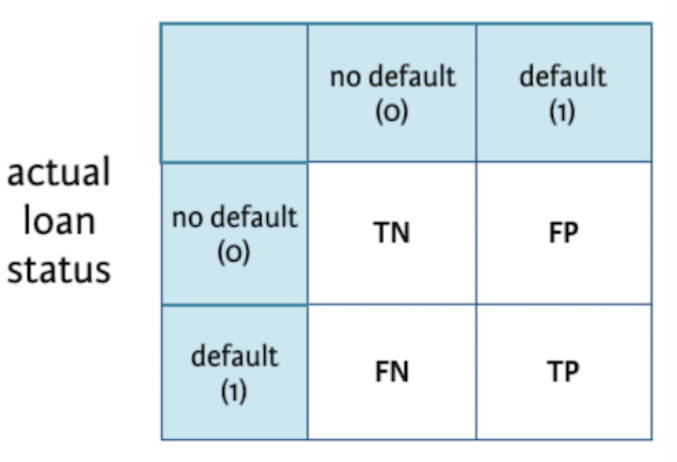

In [ ]:
# Feature Importance
#print(rfc.feature_importances_)
# You can see that we are given an importance score 
# for each attribute where the larger the score, 
# the more important the attribute.
feature = pd.DataFrame(data=[dtc.feature_importances_], columns=data.columns.values )
feature.head()

In [ ]:
#fpr, tpr, thold = metrics.roc_curve(y_test,y_pred,pos_label =1)
#roc = metrics.roc_auc_score(y_test, y_pred)

In [ ]:
# Classiﬁcation Report
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_pred,digits=3) 
print(report)

### ROC curve
* A ROC curve (receiver operating characteristic curve) grafiği sınıflandırma modelinin performansını göstermektedir.

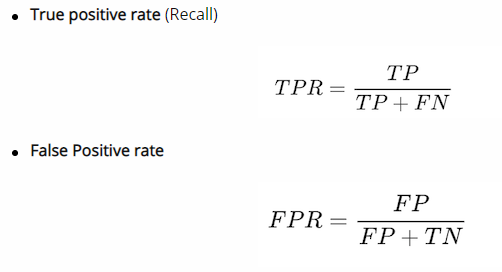

### AUC
* ROC returns the area under the curve.

In [ ]:
# ROC curve:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dtc.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<a id = "10"></a><br>
### Ensemble Models

In [ ]:
# ensembles 
ensembles = [] 
ensembles.append(('ABC', AdaBoostClassifier()))
ensembles.append(('GBC', GradientBoostingClassifier()))
ensembles.append(('RFC', RandomForestClassifier()))
ensembles.append(('ETC', ExtraTreesClassifier()))

In [ ]:
# evaluate models using cross validatiob score:
results_ensemble = [] 
names_ensemble = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy') 
    results_ensemble.append(cv_results) 
    names_ensemble.append(name) 
    print("Model Name:{} Model Acc:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

In [ ]:
# Compare Model's Acc
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x=names_ensemble, y=results_ensemble,palette="viridis");
plt.title("Compare Ensemble Model's Accuracies",fontsize = 20,color='blue')
plt.xlabel('Models',fontsize = 15,color='blue')
plt.ylabel('Accuracies',fontsize = 15,color='blue')

In [ ]:
# Tuning Random Forest Model
estimators = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29] 
criterions = ["gini","entropy"]
param_grid = dict(n_estimators=estimators,criterion=criterions) 

In [ ]:
etc = ExtraTreesClassifier()
gs = GridSearchCV(estimator=etc,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

In [ ]:
# Time to use ETC for dataset:
etc = ExtraTreesClassifier(n_estimators=25,criterion="entropy")
etc.fit(x_train,y_train)
y_pred = etc.predict(x_test)

In [ ]:
#confussion matrix: 
from sklearn import metrics
etc_cm = confusion_matrix(y_test,y_pred)
etc_cross = pd.crosstab(y_test["type"], y_pred,rownames=['Actual Values'], colnames=['Predicted Values'])
etc_acc = metrics.accuracy_score(y_test, y_pred)
print(etc_cross)
print(etc_acc)

In [ ]:
# Feature Importance
#print(rfc.feature_importances_)
# You can see that we are given an importance score 
# for each attribute where the larger the score, 
# the more important the attribute.
feature = pd.DataFrame(data=[etc.feature_importances_], columns=data.columns.values )
feature.head()

In [ ]:
# Classiﬁcation Report
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_pred,digits=3) 
print(report)

<a id = "11"></a><br>
### XGBOOST Model

In [ ]:
#model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

In [ ]:
#confussion matrix: 
from sklearn import metrics
xgb_cm = confusion_matrix(y_test,y_pred)
xgb_cross = pd.crosstab(y_test["type"], y_pred,rownames=['Actual Values'], colnames=['Predicted Values'])
xgb_acc = metrics.accuracy_score(y_test, y_pred)
print(xgb_cross)
print(xgb_acc)

In [ ]:
# Tuning XGBOOST Model
learning_rates = [0.1,0.01,0.001] 
liste = list(range(250))
estimators = liste
gammas = [1,0.5,0.1,0.01,0.001,0]
boosters = ["gbtree","gblinear","dart"]
param_grid = dict(n_estimators=estimators,learning_rate=learning_rates,gamma=gammas,booster=boosters) 

In [ ]:
xgb = XGBClassifier()
gs = GridSearchCV(estimator=xgb,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

<a id = "12"></a><br>
### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(verbose=False)
mlpc.fit(x_train, y_train)    
#mlpc.max_iter 
#mlpc.hidden_layer_sizes#node sayısı 
y_pred = mlpc.predict(x_test)

In [ ]:
mlpc.max_iter 

In [ ]:
mlpc.hidden_layer_sizes

In [ ]:
mlpc.get_params()

In [ ]:
#confussion matrix: 
from sklearn import metrics
mlpc_cm = confusion_matrix(y_test,y_pred)
mlpc_cross = pd.crosstab(y_test["type"], y_pred,rownames=['Actual Values'], colnames=['Predicted Values'])
mlpc_acc = metrics.accuracy_score(y_test, y_pred)
print(mlpc_cross)
print(mlpc_acc)

<a id = "13"></a><br>
### Comparison of Models

In [ ]:
models = ["dtc","etc","xgb","nn"]
values = [0.985,0.9982,0.9988,0.982]

In [ ]:
# Compare Model's Acc
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x=models, y=values,palette="viridis");
plt.title("Compare Ensemble Model's Accuracies",fontsize = 20,color='blue')
plt.xlabel('Models',fontsize = 15,color='blue')
plt.ylabel('Accuracies',fontsize = 15,color='blue')

<a id = "14"></a><br>
## Regression Modeling
### Avocado Price Prediction

In [38]:
data = pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [39]:
# Split Dataset, "conventional & organic"
data_con = data[data["type"] == "conventional"]
data_org = data[data["type"] == "organic"]

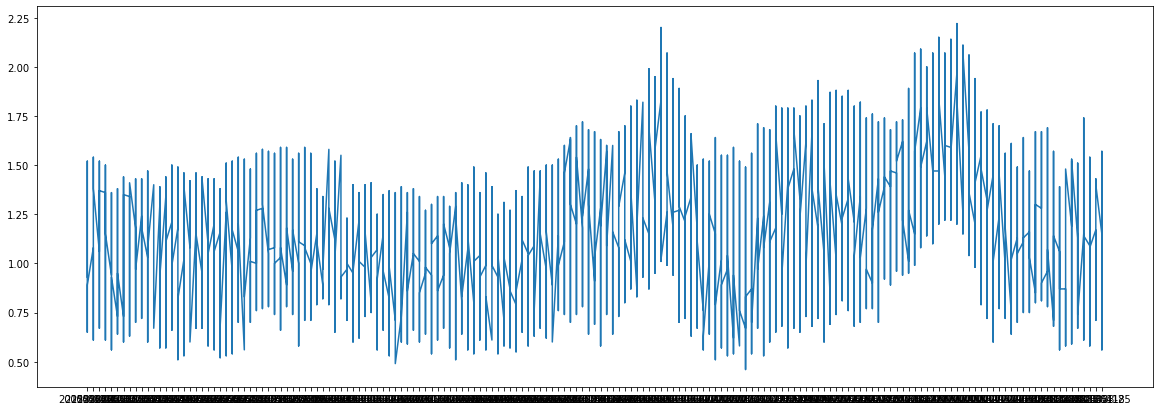

In [40]:
f,ax = plt.subplots(figsize = (20,7))
data_con = data_con.sort_values("Date")
plt.plot(data_con['Date'], data_con['AveragePrice'])

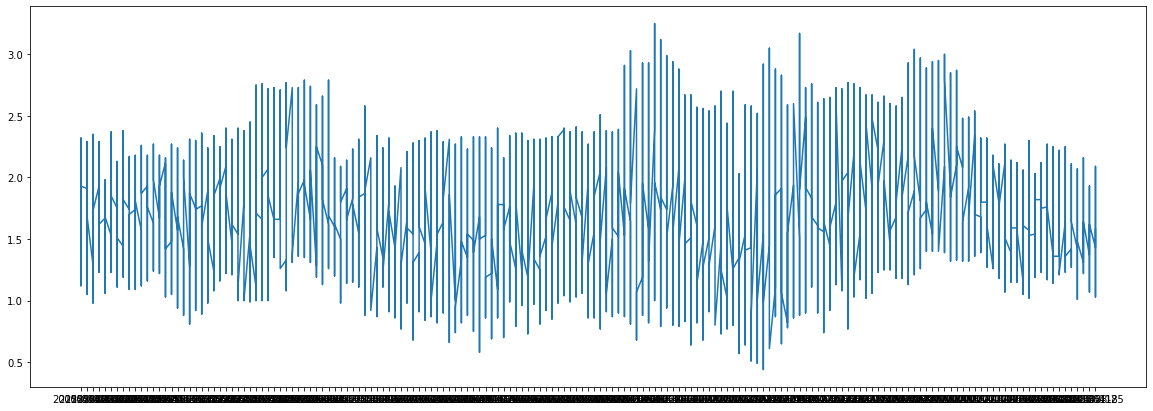

In [41]:
f,ax = plt.subplots(figsize = (20,7))
data_org = data_org.sort_values("Date")
plt.plot(data_org['Date'], data_org['AveragePrice'])

## Regression Analysis

### Future Engineering

In [42]:
# split date: day,month,year 
liste = []
for date in data.Date:
    liste.append(date.split("-"))
    
# month and day adding to lists
month = []
day = []
for i in range(len(liste)):
    month.append(liste[i][1])
    day.append(liste[i][2])
    
# adding to dataset
data["month"] = month
data["day"] = day

# delete old date column
data.drop(["Date"],axis=1,inplace=True)

#convert objects to int
data.month = data.month.values.astype(int)
data.day = data.day.values.astype(int)

In [43]:
# drop unnecessary features
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [44]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [45]:
# Split Dataset, "conventional & organic"
data_con = data[data["type"] == "conventional"]
data_org = data[data["type"] == "organic"]

In [46]:
# find dummy variables
data_con = pd.get_dummies(data_con,drop_first=True)
data_org = pd.get_dummies(data_org,drop_first=True)

In [47]:
data_con.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data_org.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
9126,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
9127,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
9128,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
9129,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
9130,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,2015,...,0,0,0,0,0,0,0,0,0,0


## Ordinary Least Squares (OLS) Estimation

In [ ]:
import statsmodels.api as sm
exog_con = data_con.iloc[:,1:].values
endog_con = data_con.iloc[:,[0]].values
r_ols_con = sm.OLS(endog_con,exog_con) #bağımlı değişken, X_l:bağımsız değişkenlerimiz.
r_con = r_ols_con.fit()
print(r_con.summary())

In [ ]:
import statsmodels.api as sm
exog_org = data_org.iloc[:,1:].values
endog_org = data_org.iloc[:,[0]].values
r_ols_org = sm.OLS(endog_org,exog_org) #bağımlı değişken, X_l:bağımsız değişkenlerimiz.
r_org = r_ols_org.fit()
print(r_org.summary())

### Observations:
* The small P values indicate that we can reject the null hypothesis that Quantity has no effect on Price.
* Hight R-squared indicates that our model explains a lot of the response variability.
* In regression analysis, we’d like our regression model to have significant variables and to produce a high R-squared value.
* We will show graphs to help interpret regression analysis results more intuitively.

In [49]:
# Y
y = data_con[["AveragePrice"]][:]

In [50]:
# X
x = data_con.drop(["AveragePrice"],axis=1,inplace=True)
x = data_con.iloc[:,1:]

In [51]:
# Scale the data to be between -1 and 1
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [52]:
# Creating Train and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

<a id = "15"></a><br>
### Classic Models

In [53]:
classic_models = [] 
classic_models.append(('LR', LinearRegression())) 
classic_models.append(('LASSO', Lasso())) 
classic_models.append(('EN', ElasticNet())) 
classic_models.append(('KNN', KNeighborsRegressor())) 
classic_models.append(('DTR', DecisionTreeRegressor())) 
classic_models.append(('SVR', SVR()))

In [54]:
# evaluate models using cross validation score:
classic_results = [] 
classic_names = []
for name, model in classic_models:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2') 
    classic_results.append(cv_results) 
    classic_names.append(name) 
    print("Model Name:{} Model Score:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

Model Name:LR Model Score:nan Model Std:nan
Model Name:LASSO Model Score:-0.001 Model Std:0.001
Model Name:EN Model Score:-0.001 Model Std:0.001
Model Name:KNN Model Score:0.683 Model Std:0.031
Model Name:DTR Model Score:0.704 Model Std:0.021
Model Name:SVR Model Score:0.624 Model Std:0.031


TypeError: Neither the `x` nor `y` variable appears to be numeric.

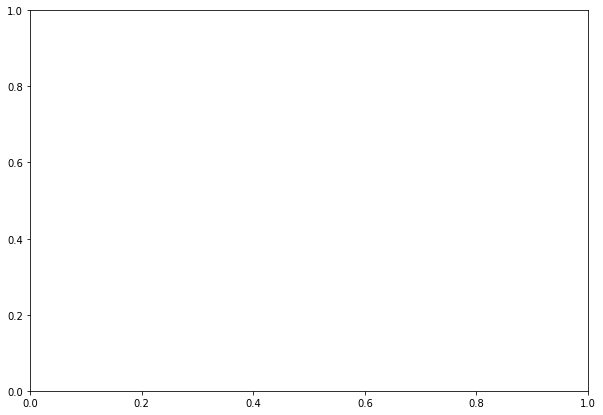

In [55]:
# Compare Model's Scores
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x=classic_names, y=classic_results,palette="viridis");
plt.title("Compare Model's Scores",fontsize = 20,color='blue')
plt.xlabel('Models',fontsize = 15,color='blue')
plt.ylabel('Scores',fontsize = 15,color='blue')

In [56]:
# Tuning Decision Tree Model
criterions = ["mse","mae"]
param_grid = dict(criterion=criterions) 

In [57]:
dtr = DecisionTreeRegressor()
gs = GridSearchCV(estimator=dtr,param_grid=param_grid,scoring="r2", cv=kfold)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.6975107131811595
Best Parameters: {'criterion': 'mse'}


In [58]:
means = grid_search.cv_results_['mean_test_score'] 
stds = grid_search.cv_results_['std_test_score'] 
params = grid_search.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

0.697511 (0.024458) with: {'criterion': 'mse'}
0.679709 (0.023274) with: {'criterion': 'mae'}


In [59]:
# Time to use KNN for dataset:
dtr = DecisionTreeRegressor(criterion="mse")
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

In [60]:
result_DFR = r2_score(y_test, y_pred)

In [61]:
print("{:.2f}".format(result_DFR))

0.74


In [62]:
results_models = []
results_models.append(result_DFR)

<a id = "16"></a><br>
### Ensemble Models

In [ ]:
# ensembles 
ensembles = [] 
ensembles.append(('ABR', AdaBoostRegressor()))
ensembles.append(('GBR', GradientBoostingRegressor()))
ensembles.append(('RFR', RandomForestRegressor()))
ensembles.append(('ETR', ExtraTreesRegressor()))

In [ ]:
# evaluate models using cross validatiob score:
results_ensemble = [] 
names_ensemble = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2') 
    results_ensemble.append(cv_results) 
    names_ensemble.append(name) 
    print("Model Name:{} Model Score:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

In [ ]:
# Compare Model's Acc
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x=names_ensemble, y=results_ensemble,palette="viridis");
plt.title("Compare Ensemble Model's Accuracies",fontsize = 20,color='blue')
plt.xlabel('Models',fontsize = 15,color='blue')
plt.ylabel('Scores',fontsize = 15,color='blue')

In [ ]:
# Tuning Extra Trees Regressior Model
estimators = list(range(25,301,25))
criterions = ["mse","mae"]
param_grid = dict(n_estimators=estimators,criterion=criterions) 

In [ ]:
# Applying Extra Trees Regressior
etr = ExtraTreesRegressor()
gs = GridSearchCV(estimator=etr,param_grid=param_grid,scoring="r2", cv=kfold)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

In [ ]:
# Time to use ETR for dataset:
etr = ExtraTreesRegressor(n_estimators=100,criterion="mse")
etr.fit(x_train,y_train)
y_pred = etr.predict(x_test)

In [ ]:
result_ETR = r2_score(y_test, y_pred)

In [ ]:
print("{:.2f}".format(result_ETR))

In [ ]:
results_models.append(result_ETR)

<a id = "17"></a><br>
### XGBOOST Model

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(silent=True)  # silent: close to warnings  
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)   

In [ ]:
result_XGB = r2_score(y_test, y_pred)

In [ ]:
print("{:.2f}".format(result_XGB))

In [ ]:
results_models.append(result_XGB)

<a id = "18"></a><br>
### Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(x_train,y_train)    
#mlp.max_iter 
#mlp.hidden_layer_sizes#node sayısı 
y_pred = mlp.predict(x_test)   

In [ ]:
result_MLP = r2_score(y_test, y_pred)

In [ ]:
print("{:.2f}".format(result_MLP))

In [ ]:
results_models.append(result_MLP)

<a id = "19"></a><br>
### Compare Models

In [ ]:
models = ["DTR","ETR","XGB","NN"]

In [ ]:
# Compare Model's Acc
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x=models, y=results_models,palette="viridis");
plt.title("Compare Ensemble Model's Scores",fontsize = 20,color='blue')
plt.xlabel('Models',fontsize = 15,color='blue')
plt.ylabel('Scores',fontsize = 15,color='blue')

<a id = "20"></a><br>
## Let's Make Some Price Predictions via ETR

In [ ]:
data_con.head()

In [ ]:
# Note that input data must be normalized
x_test_sample = np.array([[78992.15, 1132.00,  71976.41, 72.58, 5811.16, 5677.40, 133.76, 0, 2015, 8, 17, 1,0,0,0,0,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,0]])
                          
y_predict_sample = etr.predict(x_test_sample)
print('Expected Purchase Amount=', y_predict_sample)
y_predict_sample_orig = sc_y.inverse_transform(y_predict_sample)
print('Expected Purchase Amount=', y_predict_sample_orig)

<a id = "21"></a><br>
# Facebook Prophet

* Prophet is open source software released by Facebook’s Core Data Science team.
* Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 
* Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

In [ ]:
from fbprophet import Prophet

In [ ]:
data = pd.read_csv("avocado.csv")
data.head()

In [ ]:
prophet_df = data.iloc[:,[1,2]]
prophet_df.head()

In [ ]:
prophet_df = prophet_df.sort_values("Date")

In [ ]:
prophet_df = prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [ ]:
prophet_df.tail()

In [ ]:
m = Prophet()
m.fit(prophet_df)

In [ ]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# You can plot the forecast
figure1 = m.plot(forecast, xlabel='Date', ylabel='Price')

In [ ]:
# If you want to see the forecast components
figure2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

<a id = "22"></a><br>
# H20.ai AutoML

In [3]:
# pip install h2o
# or 
# pip install http://h2o-release.s3.amazonaws.com/h2o/rel-weierstrass/2/Python/h2o-3.14.0.2-py2.py3-none-any.whl
# conda install -c conda-forge h2o-py openjdk -y
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu11.41+23-CA (build 11.0.8+10-LTS, mixed mode)
  Starting server from C:\Users\monster\anaconda3\envs\tf\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\monster\AppData\Local\Temp\tmpa60zoeqp
  JVM stdout: C:\Users\monster\AppData\Local\Temp\tmpa60zoeqp\h2o_monster_started_from_python.out
  JVM stderr: C:\Users\monster\AppData\Local\Temp\tmpa60zoeqp\h2o_monster_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Istanbul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_monster_xgvqys
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.967 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("avocado_2.csv")
data.head()

,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
0,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
3,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
4,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany


In [11]:
# Load data into H2O
df = h2o.import_file("avocado_2.csv",header=-1)
df.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2015-12-27 00:00:00,1.33,64236.6,1036.74,54454.8,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
1,2015-12-20 00:00:00,1.35,54877,674.28,44638.8,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
2,2015-12-13 00:00:00,0.93,118220,794.7,109150,130.5,8145.35,8042.21,103.14,0,conventional,2015,Albany
3,2015-12-06 00:00:00,1.08,78992.1,1132,71976.4,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany
4,2015-11-29 00:00:00,1.28,51039.6,941.48,43838.4,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany
5,2015-11-22 00:00:00,1.26,55979.8,1184.27,48068,43.61,6683.91,6556.47,127.44,0,conventional,2015,Albany
6,2015-11-15 00:00:00,0.99,83453.8,1368.92,73672.7,93.26,8318.86,8196.81,122.05,0,conventional,2015,Albany
7,2015-11-08 00:00:00,0.98,109428,703.75,101815,80,6829.22,6266.85,562.37,0,conventional,2015,Albany
8,2015-11-01 00:00:00,1.02,99811.4,1022.15,87315.6,85.34,11388.4,11104.5,283.83,0,conventional,2015,Albany
9,2015-10-25 00:00:00,1.07,74338.8,842.4,64757.4,113,8625.92,8061.47,564.45,0,conventional,2015,Albany


In [12]:
df.describe()

Rows:18249
Cols:14




,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
type,int,time,real,real,real,real,real,real,real,real,real,enum,int,enum
mins,0.0,1420329600000.0,0.44,84.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,2015.0,
mean,24.232231903117977,1471131043498.2737,1.4059784097758783,850644.013008932,293008.42453065916,295154.56835607433,22839.73599265713,239639.20205983892,182194.68669570936,54338.08814455588,3106.4265072058747,,2016.1478985149872,
maxs,52.0,1521936000000.0,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.8,5719096.61,551693.65,,2018.0,
sigma,15.481044753757136,29506763366.874687,0.40267655549555065,3453545.355399472,1264989.0817627772,1204120.4011350505,107464.06843537073,986242.3992164116,746178.5149617889,243965.96454740886,17692.894651916486,,0.9399384671406118,
zeros,432,0,0,0,242,61,5497,15,159,2370,12048,,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,2015-12-27 00:00:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13 00:00:00,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany


In [13]:
y = "C3"

* 60% for training
* 20% for validation (hyper parameter tuning)
* 20% for final testing, will be withheld until the end

In [14]:
# Parse Df
splits = df.split_frame([0.6, 0.2], seed = 1)

In [15]:
splits

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2015-12-27 00:00:00,1.33,64236.6,1036.74,54454.8,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
3,2015-12-06 00:00:00,1.08,78992.1,1132,71976.4,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany
5,2015-11-22 00:00:00,1.26,55979.8,1184.27,48068,43.61,6683.91,6556.47,127.44,0,conventional,2015,Albany
7,2015-11-08 00:00:00,0.98,109428,703.75,101815,80,6829.22,6266.85,562.37,0,conventional,2015,Albany
8,2015-11-01 00:00:00,1.02,99811.4,1022.15,87315.6,85.34,11388.4,11104.5,283.83,0,conventional,2015,Albany
11,2015-10-11 00:00:00,1.28,64489.2,1582.03,52677.9,105.32,10123.9,9866.27,257.63,0,conventional,2015,Albany
13,2015-09-27 00:00:00,0.99,106803,1204.88,99409.2,154.84,6034.46,5888.87,145.59,0,conventional,2015,Albany
15,2015-09-13 00:00:00,1.28,76111.3,985.73,65696.9,142,9286.68,8665.19,621.49,0,conventional,2015,Albany
16,2015-09-06 00:00:00,1.11,99173,879.45,90062.6,240.79,7990.1,7762.87,227.23,0,conventional,2015,Albany
17,2015-08-30 00:00:00,1.07,105694,689.01,94362.7,335.43,10306.7,10218.9,87.8,0,conventional,2015,Albany


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
1,2015-12-20 00:00:00,1.35,54877,674.28,44638.8,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
4,2015-11-29 00:00:00,1.28,51039.6,941.48,43838.4,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany
6,2015-11-15 00:00:00,0.99,83453.8,1368.92,73672.7,93.26,8318.86,8196.81,122.05,0,conventional,2015,Albany
10,2015-10-18 00:00:00,1.12,84843.4,924.86,75595.9,117.07,8205.66,7877.86,327.8,0,conventional,2015,Albany
12,2015-10-04 00:00:00,1.31,61007.1,2268.32,49880.7,101.36,8756.75,8379.98,376.77,0,conventional,2015,Albany
14,2015-09-20 00:00:00,1.33,69759,1028.03,59313.1,150.5,9267.36,8489.1,778.26,0,conventional,2015,Albany
18,2015-08-23 00:00:00,1.34,79992.1,733.16,67933.8,444.78,10880.4,10745.8,134.57,0,conventional,2015,Albany
22,2015-07-26 00:00:00,1.11,106757,648.75,91949.1,966.61,13192.7,13061.5,131.16,0,conventional,2015,Albany
23,2015-07-19 00:00:00,1.26,96617,1042.1,82049.4,2238.02,11287.5,11103.5,183.99,0,conventional,2015,Albany
34,2015-05-03 00:00:00,1.2,59197.7,919.87,45490.1,217.24,12570.5,12202,368.56,0,conventional,2015,Albany


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
2,2015-12-13 00:00:00,0.93,118220,794.7,109150,130.5,8145.35,8042.21,103.14,0,conventional,2015,Albany
9,2015-10-25 00:00:00,1.07,74338.8,842.4,64757.4,113,8625.92,8061.47,564.45,0,conventional,2015,Albany
20,2015-08-09 00:00:00,1.12,111141,584.63,100961,368.95,9225.89,9116.34,109.55,0,conventional,2015,Albany
37,2015-04-12 00:00:00,1.13,48364.3,864.27,30374.2,21.5,17104.4,16438.5,665.88,0,conventional,2015,Albany
39,2015-03-29 00:00:00,1.02,67799.1,1402.28,58623.2,89.5,7684.08,7208.49,475.59,0,conventional,2015,Albany
51,2015-01-04 00:00:00,1.22,40873.3,2819.5,28287.4,49.9,9716.46,9186.93,529.53,0,conventional,2015,Albany
3,2015-12-06 00:00:00,1.07,357637,283024,23740.8,181.92,50690,37032.7,13654.7,2.71,conventional,2015,Atlanta
11,2015-10-11 00:00:00,0.95,433874,255933,91047.3,599.71,86294.1,41160,45134.2,0,conventional,2015,Atlanta
12,2015-10-04 00:00:00,0.96,418682,265797,92780.3,644.43,59460.4,14875.6,44584.8,0,conventional,2015,Atlanta
20,2015-08-09 00:00:00,1.01,503792,385028,47040.1,4251.74,67472.2,45820.4,21568.5,83.27,conventional,2015,Atlanta


[, , ]

In [16]:
# Parse Df
train = splits[0]
valid = splits[1]
test  = splits[2]

In [18]:
train

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2015-12-27 00:00:00,1.33,64236.6,1036.74,54454.8,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
3,2015-12-06 00:00:00,1.08,78992.1,1132,71976.4,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany
5,2015-11-22 00:00:00,1.26,55979.8,1184.27,48068,43.61,6683.91,6556.47,127.44,0,conventional,2015,Albany
7,2015-11-08 00:00:00,0.98,109428,703.75,101815,80,6829.22,6266.85,562.37,0,conventional,2015,Albany
8,2015-11-01 00:00:00,1.02,99811.4,1022.15,87315.6,85.34,11388.4,11104.5,283.83,0,conventional,2015,Albany
11,2015-10-11 00:00:00,1.28,64489.2,1582.03,52677.9,105.32,10123.9,9866.27,257.63,0,conventional,2015,Albany
13,2015-09-27 00:00:00,0.99,106803,1204.88,99409.2,154.84,6034.46,5888.87,145.59,0,conventional,2015,Albany
15,2015-09-13 00:00:00,1.28,76111.3,985.73,65696.9,142,9286.68,8665.19,621.49,0,conventional,2015,Albany
16,2015-09-06 00:00:00,1.11,99173,879.45,90062.6,240.79,7990.1,7762.87,227.23,0,conventional,2015,Albany
17,2015-08-30 00:00:00,1.07,105694,689.01,94362.7,335.43,10306.7,10218.9,87.8,0,conventional,2015,Albany


In [19]:
# Run AutoML
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "avocado_price")
aml.train(y = y, training_frame = train, leaderboard_frame = valid)

AutoML progress: |
23:53:52.74: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [20]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201224_235352,0.00830209,0.0911158,0.00830209,0.0645492,0.0359953
StackedEnsemble_BestOfFamily_AutoML_20201224_235352,0.00842121,0.0917672,0.00842121,0.065134,0.0362713
GBM_grid__1_AutoML_20201224_235352_model_2,0.00852647,0.0923389,0.00852647,0.065538,0.0364891
GBM_4_AutoML_20201224_235352,0.0093644,0.0967698,0.0093644,0.0694206,0.0384879
GBM_3_AutoML_20201224_235352,0.0107461,0.103664,0.0107461,0.075067,0.0413037
GBM_grid__1_AutoML_20201224_235352_model_3,0.0116897,0.108119,0.0116897,0.0782829,0.0426999
GBM_2_AutoML_20201224_235352,0.0119179,0.109169,0.0119179,0.0795728,0.0431248
GBM_grid__1_AutoML_20201224_235352_model_4,0.012047,0.109759,0.012047,0.0786234,0.043441
GBM_5_AutoML_20201224_235352,0.0137166,0.117118,0.0137166,0.0857706,0.0464212
DRF_1_AutoML_20201224_235352,0.0155368,0.124647,0.0155368,0.0887959,0.0497426


### Predict Using Leader Model

In [ ]:
pred = aml.predict(test)
pred

stackedensemble prediction progress: |

In [ ]:
test["C3"]

In [ ]:
perf = aml.leader.model_performance(test)
perf